# Car price prediction is crucial in the automotive industry for several reasons:

Consumer Decision Making: Predicting car prices helps potential buyers make informed decisions about their purchases. 
Knowing the expected price range of a car allows consumers to budget accordingly and choose a vehicle that fits their financial capabilities.

Market Competitiveness: Car manufacturers and dealerships need to understand the pricing trends in the market to remain competitive. Accurate price predictions enable them to set competitive prices for their vehicles, attract customers, and maintain or increase market share.

Inventory Management: Car dealerships rely on effective inventory management to optimize their operations. Predicting prices helps dealerships determine the appropriate stock levels and adjust their inventory based on anticipated demand and market fluctuations.

Financial Planning: Car price prediction assists financial institutions in assessing the value of vehicles for loan purposes. Banks and lending institutions need accurate predictions to determine loan amounts, interest rates, and repayment terms for car financing.

Risk Mitigation: For car manufacturers, predicting prices allows them to mitigate risks associated with production and inventory management. By anticipating price fluctuations, they can adjust production levels, manage supply chains efficiently, and minimize losses from overproduction or understocking.

# Overview of the Dataset used for this Project

The dataset has information about different cars, including their make, year, selling price, kilometers driven, fuel type, seller type, transmission type, and owner history.It has relevant features to predict the target variable.The target variable is here to predict the price of car.

# Objective of the Project

The objective is to predict the car price using different regression machine learning algorithms. Three different machine leraning alogrithms Linear regression,Random Forest Regression and Support Vector Regressor are trained on this dataset.

# Importing the Dependencies

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Data Collection and Processing

In [63]:
# loading the csv data to a Pandas DataFrame

In [64]:
df=pd.read_csv("Car Dataset.csv")

In [65]:
# print first 5 rows of the dataset

In [66]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [67]:
# print last 5 rows of the dataset

In [68]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [69]:
# number of rows and columns in the dataset

In [70]:
df.shape

(4340, 8)

In [71]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [72]:
# checking for missing values

In [73]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [74]:
# checking the distribution of 'fuel','seller_type','owner' Variables.

In [75]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [76]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [77]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [78]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [79]:
df1=df.copy()

In [80]:
# getting some info about the data

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [82]:
# statistical measures about the data

In [83]:
df1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Exploratory Data Analysis

In [84]:
#checking the distribution of data in numerical columns.

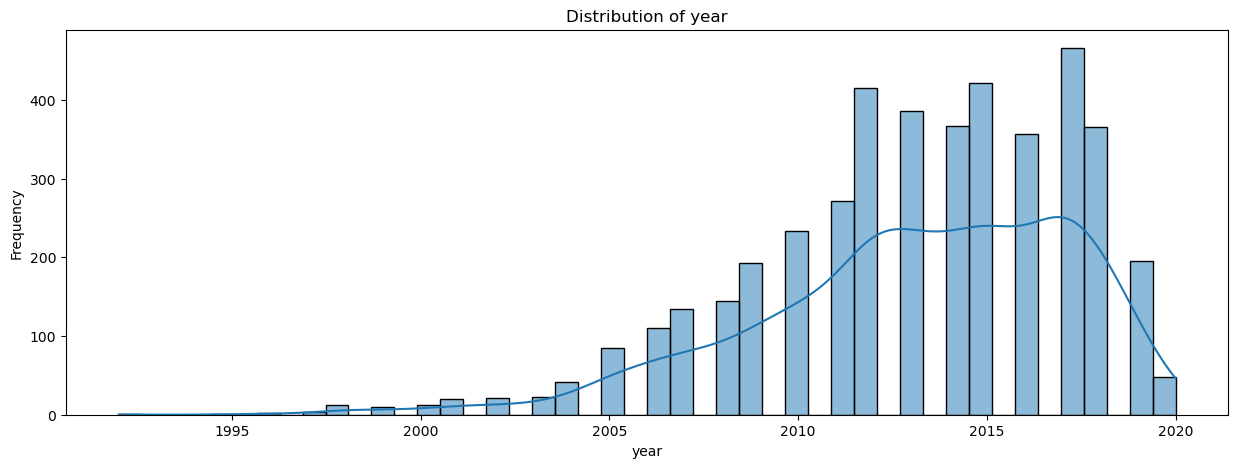

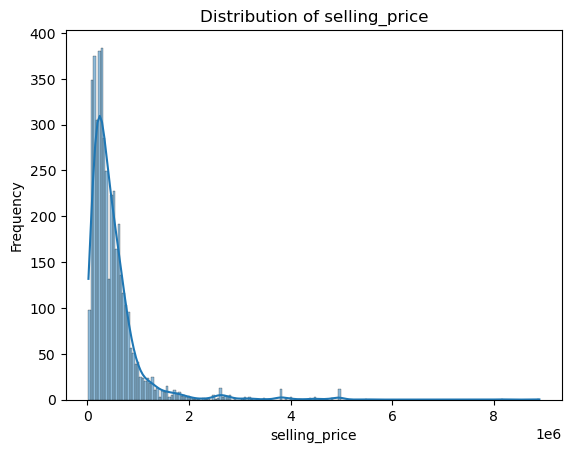

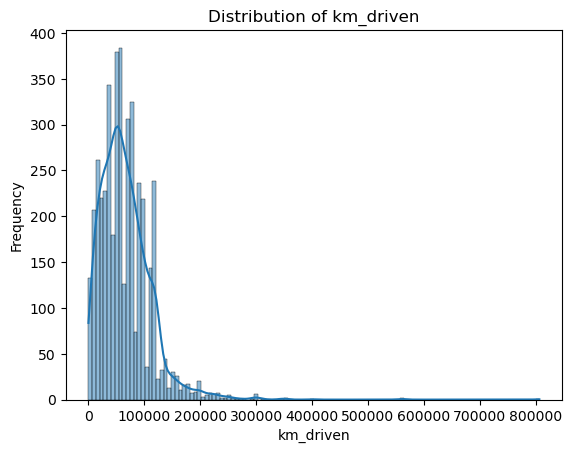

In [85]:
numerical_features = df1.select_dtypes(include='int64')


plt.figure(figsize=(15, 5))
for column in numerical_features.columns:
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

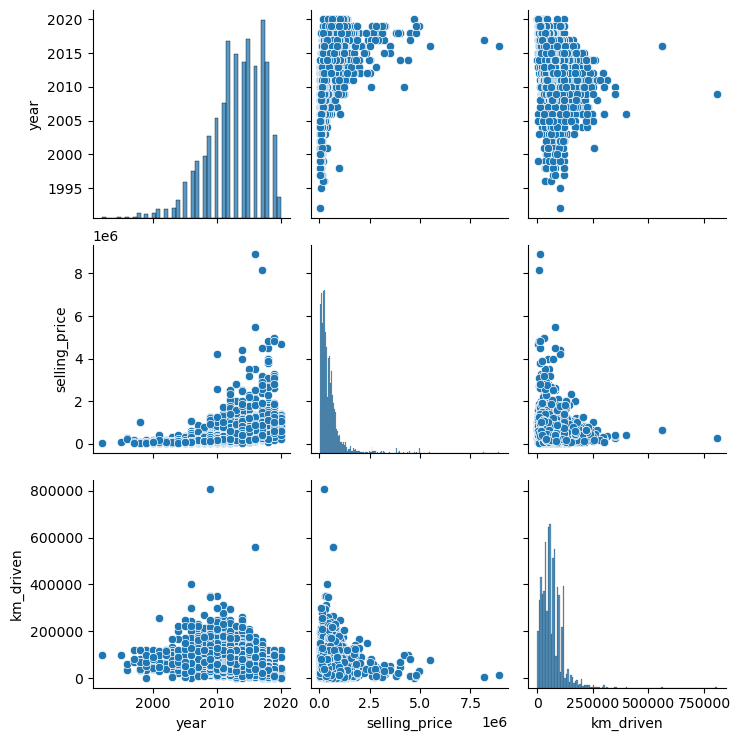

In [86]:
numerical_features = df1.select_dtypes(include='int64')

sns.pairplot(data=numerical_features)
plt.show()

# Interpreting the correlation coefficients:

In [87]:
correlation = df1[['selling_price', 'year', 'km_driven']].corr()

print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
               selling_price      year  km_driven
selling_price       1.000000  0.413922  -0.192289
year                0.413922  1.000000  -0.419688
km_driven          -0.192289 -0.419688   1.000000


Selling price and year have a positive correlation of approximately 0.41, indicating that as the year of the car increases, the selling price tends to increase as well, but the correlation is not very strong.

Selling price and kilometers driven have a weak negative correlation of approximately -0.19, suggesting that as the kilometers driven increases, the selling price tends to decrease slightly, but again, the correlation is not very strong.

Year and kilometers driven have a negative correlation of approximately -0.42, indicating that newer cars tend to have fewer kilometers driven, which is a logical expectation.

# Outlier Detection and Treatment

Outliers may sometimes represent legitimate extreme values in the data, such as unusually high or low prices for certain cars. 
Removing them could lead to a loss of important information. If outliers are due to errors, it's often appropriate to correct or remove them. However, if they represent valid but extreme observations, removing them may not be appropriate.Removing outliers can lead to a reduction in sample size, which might affect the analysis or introduce bias if the outliers are not random.

# Feature Selection and Engineering

In [88]:
#Encoding Categorical Variables such as 'fuel','seller_type','transmission','owner' using Label Encoder.

In [89]:
label_encoder = LabelEncoder()
df1["fuel"] = label_encoder.fit_transform(df1["fuel"])
df1["seller_type"] = label_encoder.fit_transform(df1["seller_type"])
df1["transmission"] = label_encoder.fit_transform(df1["transmission"])
df1["owner"] = label_encoder.fit_transform(df1["owner"])

In [90]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [91]:
#Feature Scaling to get all the values in the same range. Two features 'year' and 'km_driven'are scaled 
#using MinMaxScaler in the training dataset.

In [92]:
numerical_features = ["year", "km_driven"]
scaler = MinMaxScaler()

df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

In [93]:
df1.max(),df1.min()

(name             Volvo XC60 D5 Inscription
 year                                   1.0
 selling_price                      8900000
 km_driven                              1.0
 fuel                                     4
 seller_type                              2
 transmission                             1
 owner                                    4
 dtype: object,
 name             Ambassador CLASSIC 1500 DSL AC
 year                                        0.0
 selling_price                             20000
 km_driven                                   0.0
 fuel                                          0
 seller_type                                   0
 transmission                                  0
 owner                                         0
 dtype: object)

In [94]:
#splitting the Dataset into X and y.
#Drop the column 'name' as it is identifier column does not help to improve the performance. 
#and there by reducing the complexity of the model.

In [95]:
X = df1.drop(columns=["name", "selling_price"])  
y = df1["selling_price"] 

In [96]:
X

,year,km_driven,fuel,seller_type,transmission,owner
0,0.535714,0.086783,4,1,1,0
1,0.535714,0.061988,4,1,1,0
2,0.714286,0.123976,1,1,1,0
3,0.892857,0.057028,4,1,1,0
4,0.785714,0.174807,1,1,1,2
...,...,...,...,...,...,...
4335,0.785714,0.099181,1,1,1,2
4336,0.785714,0.099181,1,1,1,2
4337,0.607143,0.102900,4,1,1,2
4338,0.857143,0.111579,1,1,1,0


In [97]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

# Split the data into training and testing sets

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
X_train.shape,X_test.shape

((3472, 6), (868, 6))

In [100]:
y_train.shape,y_test.shape

((3472,), (868,))

# 1.Linear Regression Model

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. In the context of car price prediction, linear regression can be used to predict the selling price of a car based on various features or attributes such as the car's age, mileage, brand, model, and so on.

In [101]:
# Model Training

In [102]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [103]:
#Predictions of the Model

In [104]:
y_pred = LR.predict(X_test)

In [105]:
y_pred

array([ 4.28311148e+05,  5.33032492e+05,  8.01938587e+04,  4.85673155e+05,
        1.55288754e+06,  2.52722781e+05,  4.24441413e+05,  2.83777523e+05,
        6.65430906e+05,  2.83844021e+05,  6.64454849e+05,  6.08507027e+05,
        5.89814266e+05,  6.49794518e+04,  4.76973117e+05,  4.77171048e+05,
        8.21306731e+05,  1.36226610e+06,  1.15904585e+05,  1.46702632e+06,
        6.72541068e+05,  7.57426228e+05,  4.87462245e+05,  7.78277347e+05,
        3.35158787e+05,  6.45736828e+05,  7.18851658e+05,  2.74092305e+05,
        4.34594105e+05,  5.57011279e+05, -3.30146158e+04,  1.44367958e+06,
        5.74356910e+05,  7.42090103e+05,  5.35117604e+05,  4.71494070e+05,
        7.93915686e+05,  4.97887804e+05,  1.14747545e+05,  5.19781479e+05,
        6.14460149e+05,  4.96323970e+05,  7.30621987e+05,  4.56898286e+05,
        3.99192827e+05,  3.51537468e+05,  4.25513316e+05,  4.69179990e+05,
        7.36575109e+05,  4.72724356e+05,  2.20779846e+05,  3.33330264e+05,
        3.27508787e+05,  

# Evaluating the Model

MSE and RMSE are commonly preferred when the goal is to minimize prediction errors,R2is useful for understanding the overall goodness of fit of the model. The RMSE value, which represents the average magnitude of the errors in the predicted selling prices.

In [106]:
mse = (mean_squared_error(y_test, y_pred))

In [107]:
mse

184963450105.73517

In [108]:
r2 = r2_score(y_test, y_pred) 

In [109]:
r2

0.39390085293400134

In [110]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [111]:
rmse

430073.7728643019

In [112]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 184963450105.73517
R^2 Score: 0.39390085293400134
Root Mean Squared Error (RMSE): 430073.7728643019


# 2. Random Forest Regressor Model

Random Forest Regression is an ensemble learning technique based on the Random Forest algorithm, which is a versatile and powerful machine learning method. It's particularly effective for regression tasks, including predicting car prices, as it can handle both numerical and categorical features, deal with nonlinear relationships, and reduce overfitting.Random Forest Regressor, offers a balance between predictive performance, flexibility, and ease of use.

In [113]:
RF_regressor = RandomForestRegressor()

In [114]:
# Training Random Forest Model with Training Data

In [115]:
RF_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [116]:
y_pred = RF_regressor.predict(X_test)

In [117]:
y_pred

array([ 155950.6547619 ,  443021.66666667,  127829.16666667,
        487049.97      , 1877670.56333333,  210434.06605617,
        452935.969     ,   93335.99      ,  521631.72931349,
        248490.        ,  488022.83690476,  545072.13591964,
        522320.        ,   64250.        ,  472203.38565182,
        639850.57720058,  725352.5       , 1707350.        ,
        147998.23809524,  928400.        ,  641168.26607426,
        953530.39321789,  391794.51118326, 1041764.7472381 ,
        260155.83333333,  535996.85952936,  628771.19047619,
        295438.33333333,  344722.48160079,  417974.29292929,
        211573.33333333, 1025787.33333333,  610866.66666667,
        815459.81533333,  551473.33333333,  252867.15097338,
       1123875.83333333,  432788.17460317,  177920.80657864,
        396198.62802106,  842744.16666667,  439290.        ,
        738725.22257726,  145308.71933622,  180832.97619048,
        275452.21428571,  381631.70136236,  477364.12666667,
        761014.64285714,

# Evaluating the Model

In [118]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 152996094903.89087
R-squared (R2) Score: 0.4986533686916692
Root Mean Squared Error (RMSE): 391147.1524936502


# 3. Support Vector Regressor Model

Support Vector Regression (SVR) is a regression algorithm that extends the Support Vector Machine (SVM) algorithm for classification to the regression setting. SVR is particularly useful when dealing with datasets where the relationship between the independent variables and the dependent variable is complex or nonlinear, as it can capture complex patterns in the data and generalize well to unseen examples.

In [119]:
svr_regressor=SVR()

In [120]:
#Training SVR Model with Training Data

In [121]:
svr_regressor.fit(X_train, y_train)

SVR()

In [122]:
y_pred = svr_regressor.predict(X_test)

# Evaluating the Model

In [123]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 324425289116.57635
R-squared (R2) Score: -0.06309593007586267
Root Mean Squared Error (RMSE): 569583.4347280267


In [124]:
#Lower MSE and higher R2 values indicate better performance.

# Performing Cross Validation 

In [125]:
# Comparing the performance of different regression models using cross-validation

In [135]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the models
models = {'Linear Regression': LR,
          'Random Forest Regression': RF_regressor,
          'SVR':svr_regressor
}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Compute cross-validation scores for R-squared
    cv_scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
    # Compute cross-validation scores for MSE
    cv_scores_mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Cross-Validation R-squared Scores: {cv_scores_r2}")
    print(f"Mean R-squared Score: {np.mean(cv_scores_r2)}")
    print(f"Cross-Validation MSE Scores: {cv_scores_mse}")
    print(f"Mean MSE Score: {np.mean(cv_scores_mse)}")
    print("---------------------------------------")

Model: Linear Regression
Cross-Validation R-squared Scores: [0.46512923 0.50242    0.46033432 0.35026804 0.365876  ]
Mean R-squared Score: 0.4288055172173686
Cross-Validation MSE Scores: [2.40428127e+11 1.89405554e+11 1.71857128e+11 1.24624447e+11
 2.06823994e+11]
Mean MSE Score: 186627849957.83984
---------------------------------------
Model: Random Forest Regression
Cross-Validation R-squared Scores: [0.67785349 0.73995225 0.77569211 0.6414143  0.35518128]
Mean R-squared Score: 0.6380186854804112
Cross-Validation MSE Scores: [1.38931507e+11 1.01108338e+11 7.42606903e+10 7.45317810e+10
 2.09951440e+11]
Mean MSE Score: 119756751203.94705
---------------------------------------
Model: SVR
Cross-Validation R-squared Scores: [-0.09006857 -0.0733907  -0.07035075 -0.02502504 -0.07431397]
Mean R-squared Score: -0.06662980736490728
Cross-Validation MSE Scores: [4.89993394e+11 4.08589895e+11 3.40854371e+11 1.96609044e+11
 3.50395041e+11]
Mean MSE Score: 357288349069.00995
--------------------

# Model Selection

Based on R-squared scores and Mean Squared Error (MSE), it seems that Random Forest Regression outperforms both 
Linear Regression and SVR in terms of predictive accuracy. Linear Regression performs better than SVR, which has negative R-squared scores indicating poor performance.

Overall, it seems like Random Forest Regression is the most suitable model for predicting car prices based on the provided dataset, as it achieves the highest mean R-squared score and relatively lower mean MSE score compared to the other models. 

In [129]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,0.535714,60000,0.086783,4,1,1,0
1,Maruti Wagon R LXI Minor,0.535714,135000,0.061988,4,1,1,0
2,Hyundai Verna 1.6 SX,0.714286,600000,0.123976,1,1,1,0
3,Datsun RediGO T Option,0.892857,250000,0.057028,4,1,1,0
4,Honda Amaze VX i-DTEC,0.785714,450000,0.174807,1,1,1,2


In [136]:
file_path = "C:/Users/deepa/OneDrive/Desktop/CarData7.csv"

# Save the DataFrame to an Excel file
df1.to_csv(file_path, index=False)  # Set index=False if you don't want to include row numbers as the first column

print(f"DataFrame saved to {file_path}")

DataFrame saved to C:/Users/deepa/OneDrive/Desktop/CarData7.csv
